In [14]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from collections import Counter

In [15]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0,
    class_sep=1.5,
    random_state=2181311,
)

# X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=4112)

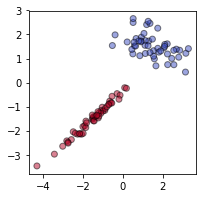

In [16]:
_, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(
    X[:, 0], X[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolors="k",
    alpha=0.5,
)

In [17]:
#distance
def distance(a, b):
    return np.linalg.norm(a - b)

In [18]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [19]:
class KNN():

    def __init__(self):
        self.preds = []

    def fit(self, X, y, k, n):

        for point in X:
            
            distances = []
            for index in range(len(X)):
                dist = distance(point, X[index])
                distances.append((X[index], dist, y[index]))
            distances.sort(key=lambda x: x[1])
            neighbors = distances[:k]
    
            self.preds.append(vote(neighbors))

        return self.preds


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
knn = KNN()
preds = knn.fit(X_train, y_train, 1, 2)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, preds)

In [26]:
accuracy

1.0